# **LIBRERIAS**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions
warnings.filterwarnings("ignore", category=FutureWarning)

print("Setup Complete")

Setup Complete


# **CARGAR BASE DE DATOS**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cancer_b.csv to cancer_b.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cancer_m.csv to cancer_m.csv


# **MOSTRAR BASE DE DATOS CANCER B**

In [ ]:
# Read the file into a variable iris_data
data_b= pd.read_csv("cancer_b.csv",delimiter=";")

# Print the first 5 rows of the data
data_b.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.11,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.5,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.23,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


# **MOSTRAR BASE DE DATOS CANCER M**


In [ ]:
# Read the file into a variable iris_data
data_m= pd.read_csv("cancer_m.csv",delimiter=";")

# Print the first 5 rows of the data
data_m.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **SMOOTHNESS BENIGNAS**

In [ ]:
Smoothness_b=data_b["Smoothness (mean)"]
Smoothness_b

0      0.09779
1      0.10750
2      0.10240
3      0.08983
4      0.08600
        ...   
352    0.08473
353    0.09261
354    0.09929
355    0.07449
356    0.05263
Name: Smoothness (mean), Length: 357, dtype: float64

# **SMOOTHNESS MALIGNO**

In [ ]:
Smoothness_m=data_m["Smoothness (mean)"]
Smoothness_m

0      0.11840
1      0.08474
2      0.10960
3      0.14250
4      0.10030
        ...   
207    0.10990
208    0.11100
209    0.09780
210    0.08455
211    0.11780
Name: Smoothness (mean), Length: 212, dtype: float64

# **ESTADISTICA DESCRIPTIVA**

La media de los datos smoothness_b es

In [ ]:
round(np.mean(Smoothness_b),4)

0.0925

La media de los datos smoothness_m es

In [ ]:
round(np.mean(Smoothness_m),4)

0.1029

La desviación estandar de los datos Smoothness_b es:

In [ ]:
round(np.std(Smoothness_b),4)

0.0134

La desviación estandar de los datos Smoothness_m es:

In [ ]:
round(np.std(Smoothness_m),4)

0.0126

La mediana de los datos Smoothness_b es:

In [ ]:
round(np.median(Smoothness_b),4)

0.0908

La mediana de los datos Smoothness_m es:

In [ ]:
round(np.median(Smoothness_m),4)

0.1022

El minimo de los datos Smoothness_b es:

In [ ]:
np.min(Smoothness_b)

0.0526299999999999

El maximo de los datos Smoothness_b es:

In [ ]:
np.max(Smoothness_b)

0.1634

El minimo de los datos Smoothness_m es:

In [ ]:
np.min(Smoothness_m)

0.07371

El maximo de los datos Smoothness_m es:

In [ ]:
np.max(Smoothness_m)

0.1447

In [ ]:
round(Smoothness_b.describe(),4)

count    357.0000
mean       0.0925
std        0.0134
min        0.0526
25%        0.0831
50%        0.0908
75%        0.1007
max        0.1634
Name: Smoothness (mean), dtype: float64

In [ ]:
round(Smoothness_m.describe(),4)

count    212.0000
mean       0.1029
std        0.0126
min        0.0737
25%        0.0940
50%        0.1022
75%        0.1109
max        0.1447
Name: Smoothness (mean), dtype: float64

# **HISTOGRAMAS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


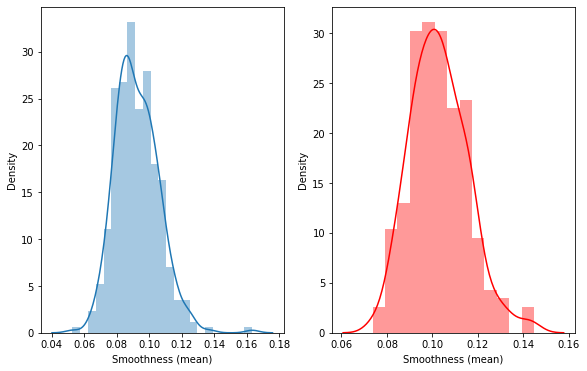

In [ ]:
# Histogram 

plt.figure(figsize=(20,6))
plt.subplot(141)
sns.distplot(a=Smoothness_b, hist=True)
plt.subplot(142)
sns.distplot(a=Smoothness_m, hist=True,color="red")
plt.show()

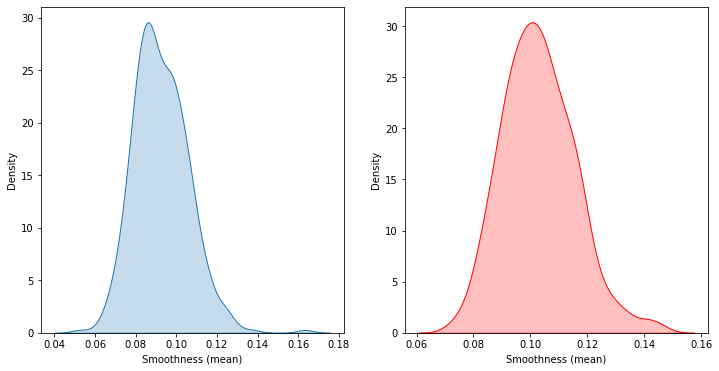

In [ ]:
# Histogram 

plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=Smoothness_b,shade=True)
plt.subplot(142)
sns.kdeplot(data=Smoothness_m,shade=True,color="red")
plt.show()

# **HISTOGRAMA SUPERPUESTO PARA COMPARACIÓN**

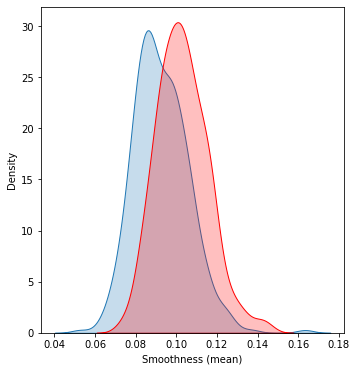

In [ ]:
# Histogram 

plt.figure(figsize=(25,6))
plt.subplot(141)
sns.kdeplot(data=Smoothness_b,shade=True)
#plt.subplot(142)
sns.kdeplot(data=Smoothness_m,shade=True,color="red")
plt.show()

# **PLOT BIVARIADO**

<Figure size 720x576 with 0 Axes>

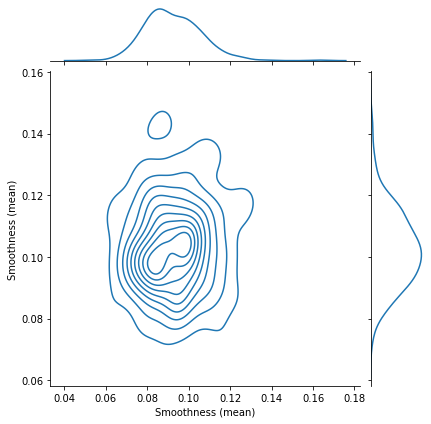

In [ ]:
# 2D KDE plot
plt.figure(figsize=(10,8))
sns.jointplot(x=Smoothness_b, y=Smoothness_m, kind="kde")
plt.show()

# **COLOR CODE PLOTS**

In [ ]:
Smoothness_b.value_counts()

0.10070    3
0.08511    3
0.11500    3
0.09462    3
0.10750    3
          ..
0.10130    1
0.09657    1
0.07215    1
0.10700    1
0.05263    1
Name: Smoothness (mean), Length: 326, dtype: int64

In [ ]:
Smoothness_m.value_counts()

0.10630    3
0.11410    3
0.10070    2
0.10490    2
0.10080    2
          ..
0.08217    1
0.10150    1
0.10920    1
0.09430    1
0.11780    1
Name: Smoothness (mean), Length: 190, dtype: int64

,sumsquare_error,aic,bic,kl_div
lognorm,2364.961593,-98.951513,692.642124,inf
beta,2367.713965,-88.981797,698.935099,inf
gamma,2373.806742,-85.132636,693.974842,inf
burr,2571.100491,-184.967258,728.355147,inf
norm,2656.834511,26.676800,728.309763,inf


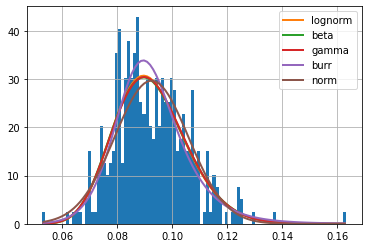

In [ ]:
fb = Fitter(Smoothness_b,distributions=['gamma','lognorm',"beta","burr","norm"])
fb.fit()
fb.summary()

La
 distribucion que mejor se ajusta es log normal

In [ ]:
fb.get_best()

{'lognorm': {'loc': 0.002885145768333231,
  's': 0.1480020414327543,
  'scale': 0.08861353783192866}}

# **PRUEBA DE HIPOTESIS**

1. Definición de hipótesis
Dado que las calificaciones se obtienen de los diferentes individuos, los datos no están emparejados.
H₀: μₛ≤μₐ
H₁ : μₛ>μₐ
2. Comprobación de supuestos
H₀: Los datos se distribuyen normalmente.
H₁: los datos no se distribuyen normalmente.
Suponga que α=0.05. Si el valor p es >0,05, se puede decir que los datos se distribuyen normalmente.


In [ ]:
import scipy as sc

In [ ]:
def check_normality(data):
    test_stat_normality, p_value_normality=sc.stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

# **PRUEBA DE NORMALIDAD**

H₀: μₛ≤μₐ

H₁ : μₛ>μₐ

Comprobación de supuestos
H₀: Los datos se distribuyen normalmente.
H₁: los datos no se distribuyen normalmente.
Suponga que α=0.05. Si el valor p es >0,05, se puede decir que los datos se distribuyen normalmente.

In [ ]:
check_normality(Smoothness_b)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed


In [ ]:
check_normality(Smoothness_m)

p value:0.0215
Reject null hypothesis >> The data is not normally distributed


# **PRUEBA CON VARIANZAS O HOMOCEDASTICIDAD**



H₀: Las varianzas de las muestras son las mismas.

H₁: Las varianzas de las muestras son diferentes.

In [ ]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= sc.stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

In [ ]:
check_variance_homogeneity(Smoothness_b,Smoothness_m)

p value:0.3604
Fail to reject null hypothesis >> The variances of the samples are same.


# **TEST DE INDEPENDENCIA**

Ho: media b < media m     (
  la media de la celulas benignas es menor que la media de las malignas)

H1: media b > media m   ( La media de la celulas benignas es mayor que la media de las malignas) 


In [ ]:
ttest,p_value = sc.stats.ttest_ind(Smoothness_b,Smoothness_m)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:0.00000000
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:0.0000
Reject null hypothesis


La primera prueba no cumplio con los requisitos, pasamos a la  mann whitney


# **Q3. MANN WHITNEY U**

Definición de hipótesis
H₀: μ₁≤μ₂

H₁ : μ₁>μ₂

Comprobación de supuestos

H₀: Los datos se distribuyen normalmente.

H₁: los datos no se distribuyen normalmente.

H₀: Las varianzas de las muestras son las mismas.

H₁: Las varianzas de las muestras son diferentes.

In [ ]:
check_normality(Smoothness_b)
check_normality(Smoothness_m)
check_variance_homogeneity(Smoothness_b, Smoothness_m)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0215
Reject null hypothesis >> The data is not normally distributed
p value:0.3604
Fail to reject null hypothesis >> The variances of the samples are same.


In [ ]:
ttest,pvalue = sc.stats.mannwhitneyu(Smoothness_m,Smoothness_b, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to recejt null hypothesis")

p-value:0.0000
Reject null hypothesis
